In [165]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import os 
from datetime import datetime
%matplotlib inline

In [ ]:
houses = pd.read_csv('houses_to_rent.csv')
houses.drop('Unnamed: 0', axis = 1, inplace = True)
houses.head()

# Вопросы
1. Сколько стоят 3-х комнатные дома с 2 ванными и с животными? 
2. Разница в расходах между 1,2,3 и тд комнатными квартирами.
3. Стоит ли брать дом с мебелью или без
4. Какого рода домов больше всего? (город, с животными/без, с меб и тд)
5. В каком городе мы меньше потратимся за похожий дом?  

# Ответы 
1. Из графика №1 мы можем увидеть средную оплату для этих домов. Сразу видно что в городе 0 меньше вариантов и в среднем дешевле оплата. Однако в 1 городе есть как дешевые варианта, так и дорогие. В 0 городе у большинства домов оплата будет от 2.4-3.4 тыс$, в городе 1 цены будут от 3.5-6.5 .Самый дорогой такой дом стоит 20 тыс+ и находится он в 1 городе. Я бы советовал искать дом в 1 городе так как выбор намного больше и цены варьируются. 
2. Комнаты бывают 1-8 и 10. Мы видим из графика №2 что дома с 1 и 2 комнаты не сильно отличаются в расходах и их медиана почти равна(2.5 тыс). 3-х комнатные квартиры уже заметно, в основном на них уже затраты идут от 4 тыс и медиана - 5 тыс, однако много домов с такой же оплатой как и у 1-2 комнатных домов. 4-х ком дома уже идут от 6 - 15 тыс, менее чем 5 тыс заметно меньше. 5 ком дома не сильно отличаются средней ценой от 4-х ком, но очень мало вариантов по сравнению с другими. 7,8,10 ком домов тоже очень мало и они варируются в цене от 7 тыс до 15. 
3. График 3 и 4. Домов без мебели намного больше, их 76%. Медиана оплаты домов без мебели чуть больше 5 тыс, без мебели - примерно 4 тыс. В с мебелью большинство домов стоят от 4 тыс до 10 тыс,без - 2.5 до 7.5 тыс.
Если помотрим на график №1, можем заметить, что среди более дорогих домов, дома с мебелью занимают более значимую часть.
Дешевые дома с мебелью встречаются реже. За дом с мебелью оплата будет примерно на 1 тыс больше. 
4. График №3. 86 процентов городов находятся в 1 городе. В основном в домах 1-4 комнаты, больше встречаются крайне редко(меньше 3%), больше всего 3 комнатныхд домов. Чаще всего в домах 1,2,3 ванные и 1 или 2 парковки. В 76% домах принимают животных и в большинстве нет мебели. 
5. График №1. Я считаю что особой разнице в цене нету между городами. В 1 городе больше вариантов и есть как бюджетные так и дорогие дома. В 0 городе в основном дома дешевле. 

In [167]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            6080 non-null   int64 
 1   area            6080 non-null   int64 
 2   rooms           6080 non-null   int64 
 3   bathroom        6080 non-null   int64 
 4   parking spaces  6080 non-null   int64 
 5   floor           6080 non-null   object
 6   animal          6080 non-null   object
 7   furniture       6080 non-null   object
 8   hoa             6080 non-null   object
 9   rent amount     6080 non-null   object
 10  property tax    6080 non-null   object
 11  fire insurance  6080 non-null   object
 12  total           6080 non-null   object
dtypes: int64(5), object(8)
memory usage: 617.6+ KB


In [170]:
# Очищаем данные, убираем буквы и переводим все в нужный тип данных
clean_houses = houses.copy()
clean_houses['floor'] = houses['floor'].replace('-', 0) 
clean_houses['floor'] = clean_houses['floor'].astype('int64')
clean_houses.iloc[:,8:] = clean_houses.iloc[:,8:].applymap(lambda x: x.strip('R$').replace(',','.'))
for i in range(len(clean_houses['total'])): # некоторые цены менее 1000$, поэтому их надо привести в 
    if '.' not in clean_houses['total'][i]:
        clean_houses['total'][i] = '0.' + clean_houses['total'][i]
clean_houses['total'] = clean_houses['total'].astype('float64')
clean_houses.head()

<ipython-input-170-9bc1aed45561>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_houses['total'][i] = '0.' + clean_houses['total'][i]


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,0,acept,furnished,0,8.000,1.000,121,9.121
1,0,64,2,1,1,10,acept,not furnished,540,820,122,11,1.493
2,1,443,5,5,4,3,acept,furnished,4.172,7.000,1.417,89,12.680
3,1,73,2,2,1,12,acept,not furnished,700,1.250,150,16,2.116
4,1,19,1,1,0,0,not acept,not furnished,0,1.200,41,16,1.257


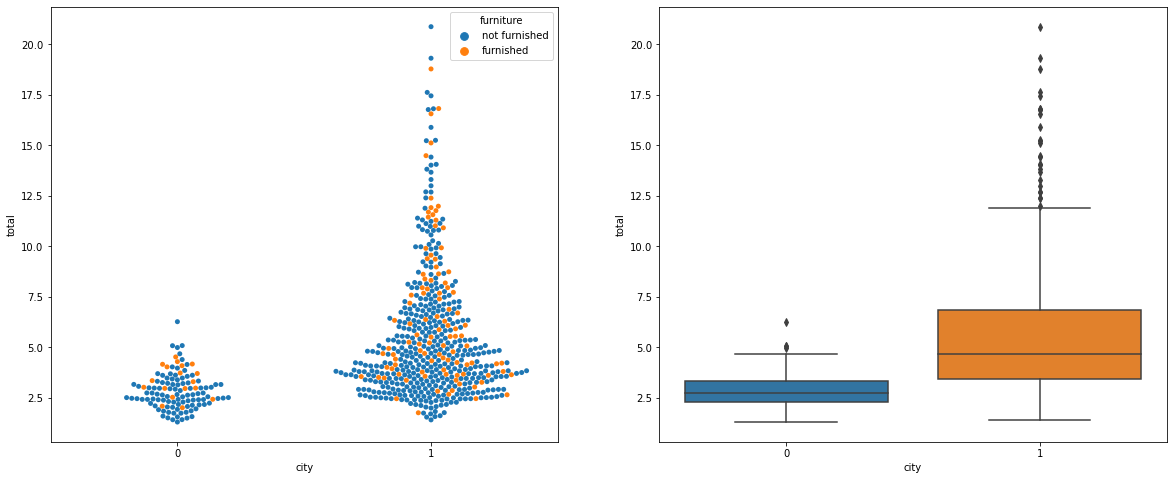

In [177]:
#График №1 
# смотрим цены на  3-х комнатные дома с 2 ванными и с животными
sorted_houses = clean_houses[(clean_houses['rooms'] == 3) & (clean_houses['bathroom'] == 2)
                             & (clean_houses['animal'] == 'acept')] # 635 rows
plt.figure(figsize = (20,8));
ax1 = plt.subplot(1,2,1);
sns.swarmplot(x = 'city', y = 'total' , hue = 'furniture', data = sorted_houses, ax = ax1);
ax2 = plt.subplot(1,2,2);
sns.boxplot(x = 'city', y = 'total', data = sorted_houses, ax = ax2);

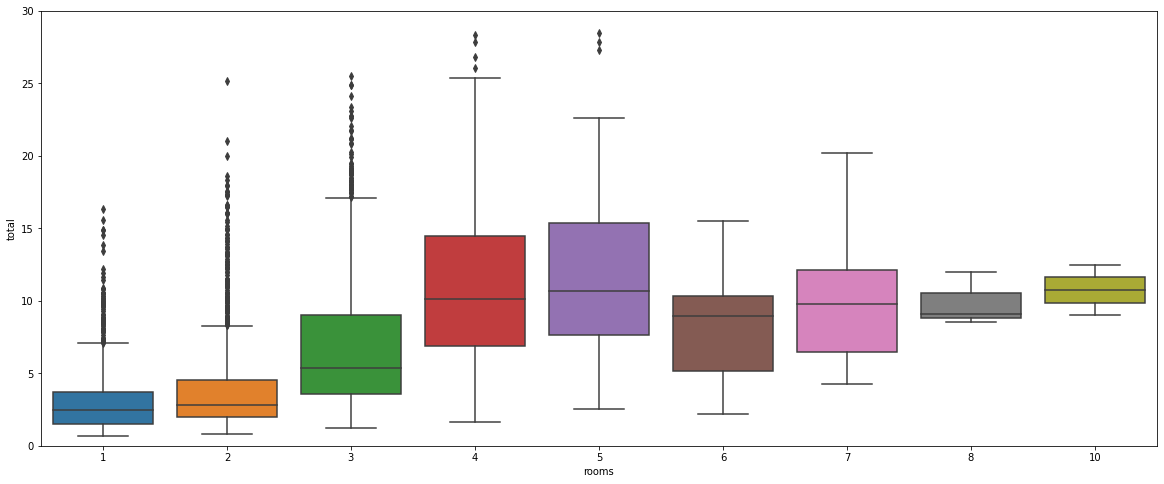

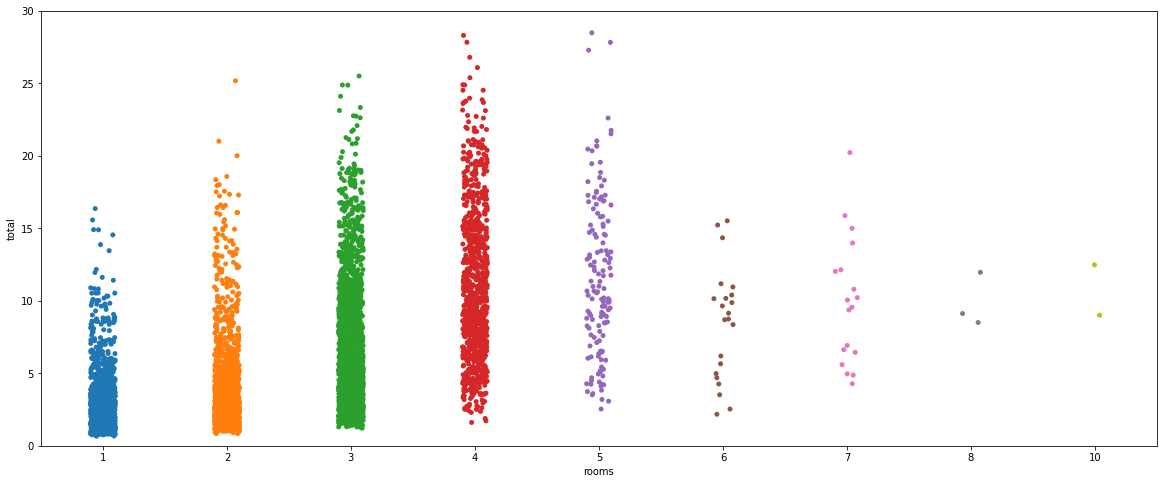

In [86]:
# График №2
# Смотрим Разницу в расходах между 1,2,3 и тд комнатными квартирами.
plt.figure(figsize = (20,8));
sns.boxplot(x = 'rooms', y = 'total', data= clean_houses)
plt.ylim(0,30);#я сделал лимит на ось у,т.к были аутлайнерс которые сильно искажали график, на общую картину они не влияют. 
plt.figure(figsize = (20,8));
sns.stripplot(x = 'rooms', y = 'total', data= clean_houses)
plt.ylim(0,30);

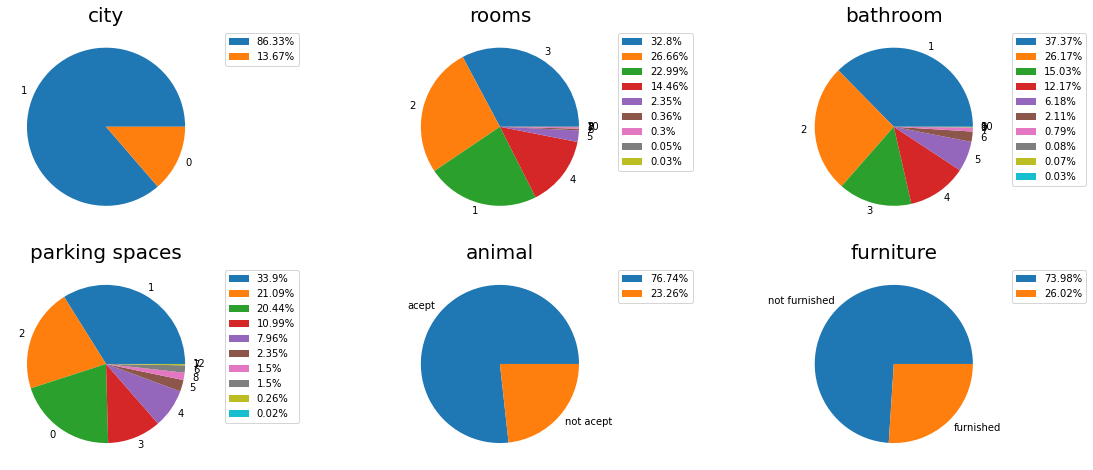

In [133]:
# График №3
# смотрим как распределенны данные по категориям
plt.figure(figsize = (20,8));
for num, name in enumerate(['city','rooms','bathroom','parking spaces','animal','furniture'], 1):
    values = clean_houses[name].value_counts()
    percentages = values/values.sum()*100
    labels_legend = round(percentages,2).astype('str').apply(lambda x: x + '%') # создаем лейблы для графиков. 
    ax = plt.subplot(2,3,num)
    ax.pie(values, labels =values.index);
    plt.title(name, fontsize = 20)
    plt.legend(labels = labels_legend, loc = 'upper right',bbox_to_anchor=(1.5, 1))
    # я не стал исп autopct, т.к надписи налигали друг на друга




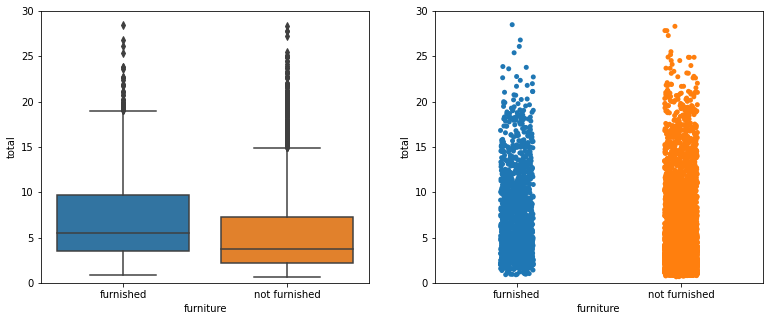

In [179]:
# График №4
# Смотрим на дома с мебелью и без . 
plt.figure(figsize = (20,5))
ax1 = plt.subplot(1,3,1)
sns.boxplot(x = 'furniture', y = 'total', data = clean_houses, ax = ax1);
plt.ylim(0,30);
ax2 = plt.subplot(1,3,2)
sns.stripplot(x = 'furniture', y = 'total',  data = clean_houses, ax = ax2);
plt.ylim(0,30);